## Steps of Natural Language Processing

### 1. Pre-processing
### 2. Tokenization
### 3. Lemmatization
### 4. Stemming
### 5. POS Tagging
### 6. Parsing
### 7. Feature Extraction

In [1]:
text = "The discovery and archaeological study of Chandraketugarh, 35 kilometres (22 mi) north of Kolkata, provide evidence that the region in which the city stands has been inhabited for over two millennia. Kolkata's recorded history began in 1690 with the arrival of the English East India Company, which was consolidating its trade business in Bengal. Job Charnock, an administrator who worked for the company, was formerly credited as the founder of the city; In response to a public petition,[30] the Calcutta High Court ruled in 2003 that the city does not have a founder. The area occupied by the present-day city encompassed three villages: Kalikata, Gobindapur, and Sutanuti. Kalikata was a fishing village; Sutanuti was a riverside weavers' village. They were part of an estate belonging to the Mughal emperor; the jagirdari (a land grant bestowed by a king on his noblemen) taxation rights to the villages were held by the Sabarna Roy Choudhury family of landowners. These rights were transferred to the East India Company in 1698."

In [6]:
import nltk
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords
import pandas as pd
nltk.download('stopwords')
stopwords = stopwords.words('english')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Sourav-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sourav-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
reviews_df = pd.read_json('gdrive/My Drive/Colab Notebooks/Automotive_5.json', lines=True)

In [2]:
import os
reviews_df = pd.read_json(r'C:\Users\Sourav-PC\Downloads\reviews_Automotive_5.json\Automotive_5.json', lines=True)

In [3]:
for i in reviews_df['reviewerID']:
  if len((reviews_df.loc[reviews_df['reviewerID'] == i]))<50 and  len((reviews_df.loc[reviews_df['reviewerID'] == i]))>40:
         print(i)
         break

A1U6RLUA8D5DSX


In [4]:
ratings = reviews_df['overall'][1000:2000]
avg = sum(ratings)/len(ratings)
print(avg)

4.49


### Stopword Removal

In [7]:
import re
total_text = pd.DataFrame()
total_text['clean_text'] =  reviews_df['reviewText'][1000:2000].apply(lambda x: re.sub('[^a-zA-Z.]+', ' ', x))
total_text['token'] = total_text['clean_text'].apply(lambda x: [item.lower() for item in x.split(' ') if item.lower() not in stopwords])
total_text['clean_text'] =  total_text['token'].apply(lambda x: ' '.join(x))

In [7]:
reviews_df['reviewText']

0        I needed a set of jumper cables for my new car...
1        These long cables work fine for my truck, but ...
2        Can't comment much on these since they have no...
3        I absolutley love Amazon!!!  For the price of ...
4        I purchased the 12' feet long cable set and th...
                               ...                        
20468    I've bought 10 of these over the past year to ...
20469    OK, I have to admit, the price of this item di...
20470    I love my skull face mask. It makes me outstan...
20471    This mask of course as described is half-face ...
20472    Good light weight for just cool nights or rain...
Name: reviewText, Length: 20473, dtype: object

In [8]:
total_text['clean_text']

1000    worth money. use old cotton shirt cut up. also...
1001    got use lexol leather cleaner spray. worked gr...
1002    bought use lexol leather cleaner conditioner v...
1003    love things. could cheaper still reasonable se...
1004    nothing fancy basic terry cloth sponges.i used...
                              ...                        
1995    bought dad automatic satellite camper would ne...
1996    used power compressor used change break fluid ...
1997    adapter works clips open wide enough clamp bat...
1998    clamps chincy wire guage smaller extension put...
1999    bought viar p foot extension bucks feet . care...
Name: clean_text, Length: 1000, dtype: object

In [9]:
reviews_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3F73SC1LY51OO,B00002243X,Alan Montgomery,"[4, 4]",I needed a set of jumper cables for my new car...,5,Work Well - Should Have Bought Longer Ones,1313539200,"08 17, 2011"
1,A20S66SKYXULG2,B00002243X,alphonse,"[1, 1]","These long cables work fine for my truck, but ...",4,Okay long cables,1315094400,"09 4, 2011"
2,A2I8LFSN2IS5EO,B00002243X,Chris,"[0, 0]",Can't comment much on these since they have no...,5,Looks and feels heavy Duty,1374710400,"07 25, 2013"
3,A3GT2EWQSO45ZG,B00002243X,DeusEx,"[19, 19]",I absolutley love Amazon!!! For the price of ...,5,Excellent choice for Jumper Cables!!!,1292889600,"12 21, 2010"
4,A3ESWJPAVRPWB4,B00002243X,E. Hernandez,"[0, 0]",I purchased the 12' feet long cable set and th...,5,"Excellent, High Quality Starter Cables",1341360000,"07 4, 2012"
5,A1ORODEBRN64C,B00002243X,"James F. Magowan ""Jimmy Mac""","[1, 1]","These Jumper cables are heavy Duty, Yet easy t...",5,Compact and Strong !,1258156800,"11 14, 2009"
6,A2R49ZN3G6FTCQ,B00002243X,John M. Harrell,"[1, 1]",bought these for my k2500 suburban plenty of l...,5,nice cables,1326153600,"01 10, 2012"
7,A1Q65KYDKXIX8E,B00002243X,Leeland H.,"[0, 0]",these are good enough to get most motorized ve...,5,for cars and pickups,1371081600,"06 13, 2013"
8,A3BI8BKIHESDNQ,B00002243X,L. J. Cunningham,"[0, 0]",The Coleman Cable 08665 12-Feet Heavy-Duty Tru...,4,Coleman Cable 08665 12-Feet Heavy-Duty Truck a...,1374105600,"07 18, 2013"
9,A1R089P5AS26UE,B00002243X,Mike,"[0, 0]","I have an old car, Its bound to need these som...",5,Beefy,1390348800,"01 22, 2014"


In [7]:
from nltk import word_tokenize, pos_tag, pos_tag_sents
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

texts_train = total_text['clean_text'].tolist()
tagged_texts_train = pos_tag_sents(map(word_tokenize, texts_train))
total_text['POS'] = tagged_texts_train

[nltk_data] Downloading package punkt to C:\Users\Sourav-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sourav-PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
total_text['clean_text']

1000    worth money. use old cotton shirt cut up. also...
1001    got use lexol leather cleaner spray. worked gr...
1002    bought use lexol leather cleaner conditioner v...
1003    love things. could cheaper still reasonable se...
1004    nothing fancy basic terry cloth sponges.i used...
                              ...                        
1995    bought dad automatic satellite camper would ne...
1996    used power compressor used change break fluid ...
1997    adapter works clips open wide enough clamp bat...
1998    clamps chincy wire guage smaller extension put...
1999    bought viar p foot extension bucks feet . care...
Name: clean_text, Length: 1000, dtype: object

In [9]:
total_text['token']

1000    [worth, money., use, old, cotton, shirt, cut, ...
1001    [got, use, lexol, leather, cleaner, spray., wo...
1002    [bought, use, lexol, leather, cleaner, conditi...
1003    [love, things., could, cheaper, still, reasona...
1004    [nothing, fancy, basic, terry, cloth, sponges....
                              ...                        
1995    [bought, dad, automatic, satellite, camper, wo...
1996    [used, power, compressor, used, change, break,...
1997    [adapter, works, clips, open, wide, enough, cl...
1998    [clamps, chincy, wire, guage, smaller, extensi...
1999    [bought, viar, p, foot, extension, bucks, feet...
Name: token, Length: 1000, dtype: object

In [12]:
total_text['POS']

1000    [(worth, JJ), (money, NN), (., .), (use, NN), ...
1001    [(got, NNS), (use, VBP), (lexol, JJ), (leather...
1002    [(bought, VBN), (use, NN), (lexol, VBZ), (leat...
1003    [(love, VB), (things, NNS), (., .), (could, MD...
1004    [(nothing, NN), (fancy, JJ), (basic, JJ), (ter...
                              ...                        
1995    [(bought, VBN), (dad, NNS), (automatic, JJ), (...
1996    [(used, VBN), (power, NN), (compressor, NN), (...
1997    [(adapter, NN), (works, VBZ), (clips, NNS), (o...
1998    [(clamps, NNS), (chincy, NN), (wire, NN), (gua...
1999    [(bought, VBN), (viar, NNS), (p, JJ), (foot, J...
Name: POS, Length: 1000, dtype: object

In [13]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plot
from sklearn.metrics import mean_squared_error
xTrain, xTest, yTrain, yTest = train_test_split(total_text['clean_text'], ratings, test_size = 0.2, random_state = 0)



### Features with out pre-processing 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
#text = review_text.tolist()
# create the transform
vectorizer = CountVectorizer(max_features=2000)
# tokenize and build vocab
vector_train = vectorizer.fit_transform(xTrain)
vector_test = vectorizer.fit_transform(xTest)
# summarize
print(vectorizer.vocabulary_)
# encode document
#vector = vectorizer.transform(text)
# summarize encoded vector
print(vector_train.shape)
print(type(vector_train))
print(vector_train.toarray())


{'handy': 837, 'toss': 1758, 'trunk': 1791, 'using': 1844, 'protect': 1175, 'ciggy': 293, 'lighter': 950, 'socket': 1507, 'could': 393, 'get': 773, 'every': 602, 'car': 235, 'one': 1081, 'use': 1836, 'air': 42, 'pump': 1184, 'powerful': 1153, 'camp': 226, 'light': 949, 'note': 1064, 'plugs': 1137, 'limited': 955, 'around': 95, 'amps': 65, 'fuse': 748, 'circuit': 297, 'breaker': 170, 'addition': 22, 'long': 968, 'run': 1340, 'small': 1490, 'higher': 866, 'resistance': 1293, 'wire': 1945, 'jack': 910, 'may': 1001, 'cause': 256, 'voltage': 1875, 'drop': 534, 'equipment': 593, 'short': 1441, 'hard': 843, 'wiring': 1947, 'directly': 478, 'next': 1057, 'best': 129, 'thing': 1710, 'this': 1716, 'none': 1061, 'course': 399, 'battery': 122, 'know': 924, 'sparks': 1530, 'fingers': 683, 'you': 1993, 'might': 1016, 'also': 54, 'want': 1882, 'pick': 1125, 'heavy': 855, 'duty': 552, 'female': 663, 'plug': 1136, 'extension': 621, 'cord': 383, 'hi': 863, 'lift': 948, 'name': 1047, 'still': 1591, 'firs

In [125]:
yTrain.shape

(800,)

In [15]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plot
from sklearn.metrics import mean_squared_error

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

linearRegressor = LinearRegression()


linearRegressor.fit(vector_train, yTrain)
pred = linearRegressor.predict(vector_test)

# model evaluation
rmse = mean_squared_error(yTest, pred)
#r2 = r2_score(yTest, pred)

# printing values
print('Slope:' ,linearRegressor.coef_)
print('Root mean squared error: ', rmse)




Slope: [ 0.22052654  0.00831514 -0.17062119 ... -0.31512764  0.0827449
 -0.08548663]
Root mean squared error:  2.710748704862615


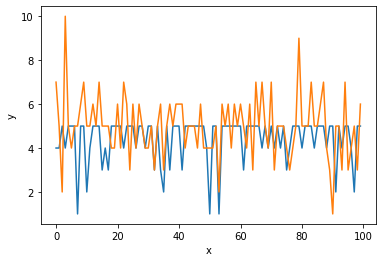

In [17]:
# plotting values
pred1 = [round(x) for x in pred ]
# data points
plt.plot(yTest[100:].tolist())
plt.plot(pred1[100:])
plt.xlabel('x')
plt.ylabel('y')


plt.show()

### Improve the result.
#### use following - 
 #### 1. Lemmatization or stemming which ever you seems appropriate
 #### 2. Apply Tf-Idf
 #### 3. Balance the dataset in terms of ratings
 #### 4. Convert the ratings into binary and apply 3 different classifiers to classify.

In [202]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plot
from sklearn.metrics import mean_squared_error
xTrain, xTest, yTrain, yTest = train_test_split(total_text['token'], ratings, test_size = 0.2, random_state = 0)

In [203]:
yTrain

1687    5
1500    4
1332    4
1979    5
1817    4
       ..
1835    5
1192    5
1629    5
1559    3
1684    5
Name: overall, Length: 800, dtype: int64

In [204]:
xTrain

1687    [used, pads, porter, cable, xp, inch, variable...
1500    [would, recomend, diyr, great, around, garage,...
1332    [want, product, around, yrs, yrs, buy, this., ...
1979    [using, product, years, never, failed, me., on...
1817    [little, pricey, come, cruiser, plate, cover.,...
                              ...                        
1835    [like, icing, cake, finishing, plates., see, l...
1192    [originally, interested, one, larger, pullers,...
1629    [love, taking, care, vehicles., used, many, ex...
1559    [meguiar, scratch, x, ., seems, job, little, s...
1684    [pad, works, described., used, along, remove, ...
Name: token, Length: 800, dtype: object

In [205]:
xTest.shape

(200,)

In [21]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Sourav-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [206]:
type(total_text)

pandas.core.frame.DataFrame

In [207]:
x_train=pd.DataFrame()


In [213]:
#Lemmatization (1st part) on x_train

from nltk.stem import WordNetLemmatizer 
lmtzr = WordNetLemmatizer()

for i in xTrain:
    ans=[]
    for j in i:
        df=lmtzr.lemmatize(j)
        ans.append(df)
    df={'value':ans}
    x_train=x_train.append(df,ignore_index=True)
    
x_train.head()

,value
0,"[used, pad, porter, cable, xp, inch, variable,..."
1,"[would, recomend, diyr, great, around, garage,..."
2,"[want, product, around, yr, yr, buy, this., wo..."
3,"[using, product, year, never, failed, me., one..."
4,"[little, pricey, come, cruiser, plate, cover.,..."


In [211]:
yTrain
y_train=pd.DataFrame()
y_test=pd.DataFrame()
for i in yTrain:
    xx={'value':i}
    y_train=y_train.append(xx,ignore_index=True)
for i in yTest:
    xx={'value':i}
    y_test=y_test.append(xx,ignore_index=True)
y_test.head()

,value
0,5.0
1,4.0
2,5.0
3,3.0
4,5.0


In [70]:
x_train['value']

0      [used, pad, porter, cable, xp, inch, variable,...
1      [would, recomend, diyr, great, around, garage,...
2      [want, product, around, yr, yr, buy, this., wo...
3      [using, product, year, never, failed, me., one...
4      [little, pricey, come, cruiser, plate, cover.,...
                             ...                        
795    [like, icing, cake, finishing, plates., see, l...
796    [originally, interested, one, larger, puller, ...
797    [love, taking, care, vehicles., used, many, ex...
798    [meguiar, scratch, x, ., seems, job, little, s...
799    [pad, work, described., used, along, remove, s...
Name: value, Length: 800, dtype: object

In [61]:
x_test=pd.DataFrame()

In [212]:
#Lemmatization (1st part) on x_test

from nltk.stem import WordNetLemmatizer 
lmtzr = WordNetLemmatizer()

for i in xTest:
    ans=[]
    for j in i:
        df=lmtzr.lemmatize(j)
        ans.append(df)
    df={'value':ans}
    x_test=x_test.append(df,ignore_index=True)

x_test.head()

,value
0,"[handy, toss, trunk., using, protect, ciggy, l..."
1,"[hi, lift, life, name, still, first, sceptical..."
2,"[great, product, money., worked, described, bu..."
3,"[purchased, product, due, fact, unfortunately,..."
4,"[used, meguiar, product, decade, trust, brand...."


In [96]:
x_test['value']

0      [handy, toss, trunk., using, protect, ciggy, l...
1      [hi, lift, life, name, still, first, sceptical...
2      [great, product, money., worked, described, bu...
3      [purchased, product, due, fact, unfortunately,...
4      [used, meguiar, product, decade, trust, brand....
                             ...                        
195    [ordered, polish, clean, aluminum, wheel, demo...
196    [month, pretty, much, cleared, musty, smell, a...
197    [nice, rig, becomes, unhappy, stick, use, cold...
198    [faithful, user, meguiar, product, long, time....
199    [get, lower, adjusting, screw, ratchet, thick,...
Name: value, Length: 200, dtype: object

In [101]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plot
from sklearn.metrics import mean_squared_error

In [215]:
#Applying TF-IDF

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = TfidfVectorizer(max_features=2000)

vector_train = vectorizer.fit_transform(ss_xtrain)
vector_test = vectorizer.fit_transform(ss_xtest)
# summarize
print(vectorizer.vocabulary_)

print(vector_train.shape)
print(type(vector_train))
print(vector_train.toarray())

{'handy': 790, 'toss': 1770, 'trunk': 1802, 'using': 1852, 'protect': 1220, 'ciggy': 322, 'lighter': 891, 'socket': 1536, 'could': 417, 'get': 762, 'every': 633, 'car': 267, 'one': 1114, 'use': 1845, 'air': 42, 'pump': 1233, 'powerful': 1193, 'camp': 259, 'light': 890, 'note': 1085, 'plug': 1175, 'limited': 896, 'around': 93, 'amp': 64, 'circuit': 325, 'breaker': 204, 'addition': 22, 'long': 909, 'run': 1385, 'small': 1521, 'higher': 812, 'resistance': 1340, 'wire': 1947, 'jack': 853, 'may': 961, 'cause': 287, 'voltage': 1883, 'drop': 569, 'equipment': 624, 'short': 1475, 'hard': 794, 'wiring': 1948, 'directly': 516, 'next': 1067, 'best': 159, 'thing': 1724, 'this': 1729, 'none': 1078, 'course': 422, 'battery': 140, 'know': 865, 'spark': 1557, 'polarity': 1179, 'finger': 708, 'you': 1993, 'might': 989, 'also': 54, 'want': 1890, 'pick': 1158, 'heavy': 802, 'duty': 586, 'male': 942, 'female': 692, 'extension': 652, 'cord': 407, 'hi': 809, 'lift': 889, 'life': 888, 'name': 1046, 'still': 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [192]:
#Linear Regression on the dataset clearing stating the RMSE has decreased from the previous value(ie 2.7) after Lemmatization

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

linearRegressor = LinearRegression()


linearRegressor.fit(vector_train, ss_ytrain)
pred = linearRegressor.predict(vector_test)

# model evaluation
rmse = mean_squared_error(ss_ytest, pred)
#r2 = r2_score(yTest, pred)

# printing values
print('Slope:' ,linearRegressor.coef_)
print('Root mean squared error: ', rmse)



Slope: [-1.01241334 -0.26241334  0.04793131 ...  0.2375866   0.73758651
 -0.26241334]
Root mean squared error:  1.3558203506130542


In [184]:
ss_xtrain=pd.Series()
ss_ytrain=pd.Series()
k=0
for i in x_train['value']:
    
    m=pd.Series(i)
    ss_xtrain=ss_xtrain.append(m)
    for j in range(len(i)):
        m1=pd.Series(y_train['value'][k])
        ss_ytrain=ss_ytrain.append(m1)
    k=k+1

In [186]:
ss_xtrain.shape,ss_ytrain.shape

((34022,), (34022,))

In [187]:
ss_xtest=pd.Series()
ss_ytest=pd.Series()
k=0
for i in x_test['value']:
    
    m=pd.Series(i)
    ss_xtest=ss_xtest.append(m)
    for j in range(len(i)):
        m1=pd.Series(y_test['value'][k])
        ss_ytest=ss_ytest.append(m1)
    k=k+1
    

In [189]:
ss_ytest.shape,ss_ytest.shape

((7980,), (7980,))

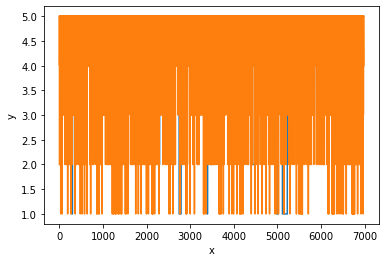

In [199]:
# plotting values
pred1 = [round(x) for x in pred ]
# data points
plt.plot(ss_ytest[1000:].tolist())
plt.plot(pred1[1000:])
plt.xlabel('x')
plt.ylabel('y')


plt.show()

### 1)Linear Regression after Lemmatization done above
### 2)KNN Classifier 
### 3)Decision Tree

In [195]:
#knn classifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(vector_train,ss_ytrain)
pred = classifier.predict(vector_test)
print("accuracy: {}".format(accuracy_score(ss_ytest, pred)*100))


accuracy: 47.330827067669176


In [196]:
#using Decision Tree having maximum depth 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=5, min_samples_leaf=5)
clf_entropy.fit(vector_train,ss_ytrain)
y_pred_en = clf_entropy.predict(vector_test)
print ("accuracy: {}".format(accuracy_score(ss_ytest,y_pred_en)*100))

accuracy: 65.21303258145363
